In [2]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from collections import defaultdict
import xml.etree.ElementTree as et
import io

## Business Attributes columns:
Index(['business_id', 'BusinessAcceptsCreditCards', 'BusinessParking_garage',
       'BusinessParking_street', 'BusinessParking_validated',
       'BusinessParking_lot', 'BusinessParking_valet',
       'RestaurantsPriceRange2', 'GoodForKids', 'WheelchairAccessible',
       'BikeParking', 'Alcohol', 'HasTV', 'NoiseLevel', 'RestaurantsAttire',
       'Music_dj', 'Music_background_music', 'Music_no_music', 'Music_karaoke',
       'Music_live', 'Music_video', 'Music_jukebox', 'Ambience_romantic',
       'Ambience_intimate', 'Ambience_classy', 'Ambience_hipster',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_trendy',
       'Ambience_upscale', 'Ambience_casual', 'RestaurantsGoodForGroups',
       'Caters', 'WiFi', 'RestaurantsReservations', 'RestaurantsTakeOut',
       'HappyHour', 'GoodForDancing', 'RestaurantsTableService',
       'OutdoorSeating', 'RestaurantsDelivery', 'BestNights_monday',
       'BestNights_tuesday', 'BestNights_friday', 'BestNights_wednesday',
       'BestNights_thursday', 'BestNights_sunday', 'BestNights_saturday',
       'GoodForMeal_dessert', 'GoodForMeal_latenight', 'GoodForMeal_lunch',
       'GoodForMeal_dinner', 'GoodForMeal_breakfast', 'GoodForMeal_brunch',
       'Smoking', 'DriveThru', 'DogsAllowed', 'BusinessAcceptsBitcoin',
       'Open24Hours', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService'],
      dtype='object')

# TODO
* clean NAN, duplicates, misspelling

# Read restaurants data.

In [4]:
restaurants = pd.read_csv("data/yelp/yelp_restaurants.csv")
restaurants.drop(columns='Unnamed: 0', inplace=True)
restaurants.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
1,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants
2,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",NaN,"""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,5.0,15,1,Coffee & Tea;Ice Cream & Frozen Yogurt;Food
3,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""",NaN,"""737 West Pike St""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,Breakfast & Brunch;Gluten-Free;Coffee & Tea;Fo...
4,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",Markham Village,"""35 Main Street N""",Markham,ON,L3P 1X3,43.875177,-79.260153,4.0,38,1,Bakeries;Bagels;Food


In [68]:
restaurants.state.unique()

array(['OH', 'BW', 'PA', 'ON', 'NC', 'SC', 'QC', 'AZ', 'NV', 'MLN', 'WI',
       'IL', 'EDH', 'CO', 'NYK', 'CHE', 'HLD', 'ABE', 'WLN', 'KHL', 'NY',
       'FIF', 'PKN', 'ST', '01', 'GLG', 'C', 'VS', 'ESX', 'ELN', 'IN',
       'CA', '30', 'NI', 'BY', 'AK', 'FLN', '6', 'B', 'VA', 'HU', '3',
       'XGL', 'ZET', 'RCC', 'WHT'], dtype=object)

# Find most popular values for city, category, etc.

In [74]:
# Get counts for each city
city_states = [(r[0], r[1]) for r in restaurants[['city', 'state']].values]
city_count = Counter(city_states)

In [81]:
city_count_condensed = defaultdict(int)
for t, count in city_count.items():
    key = t
    if count <= 200:
        key = ("Other")
    city_count_condensed[key] += count
print(len(city_count), len(city_count_condensed))
    

859 66


<BarContainer object of 66 artists>

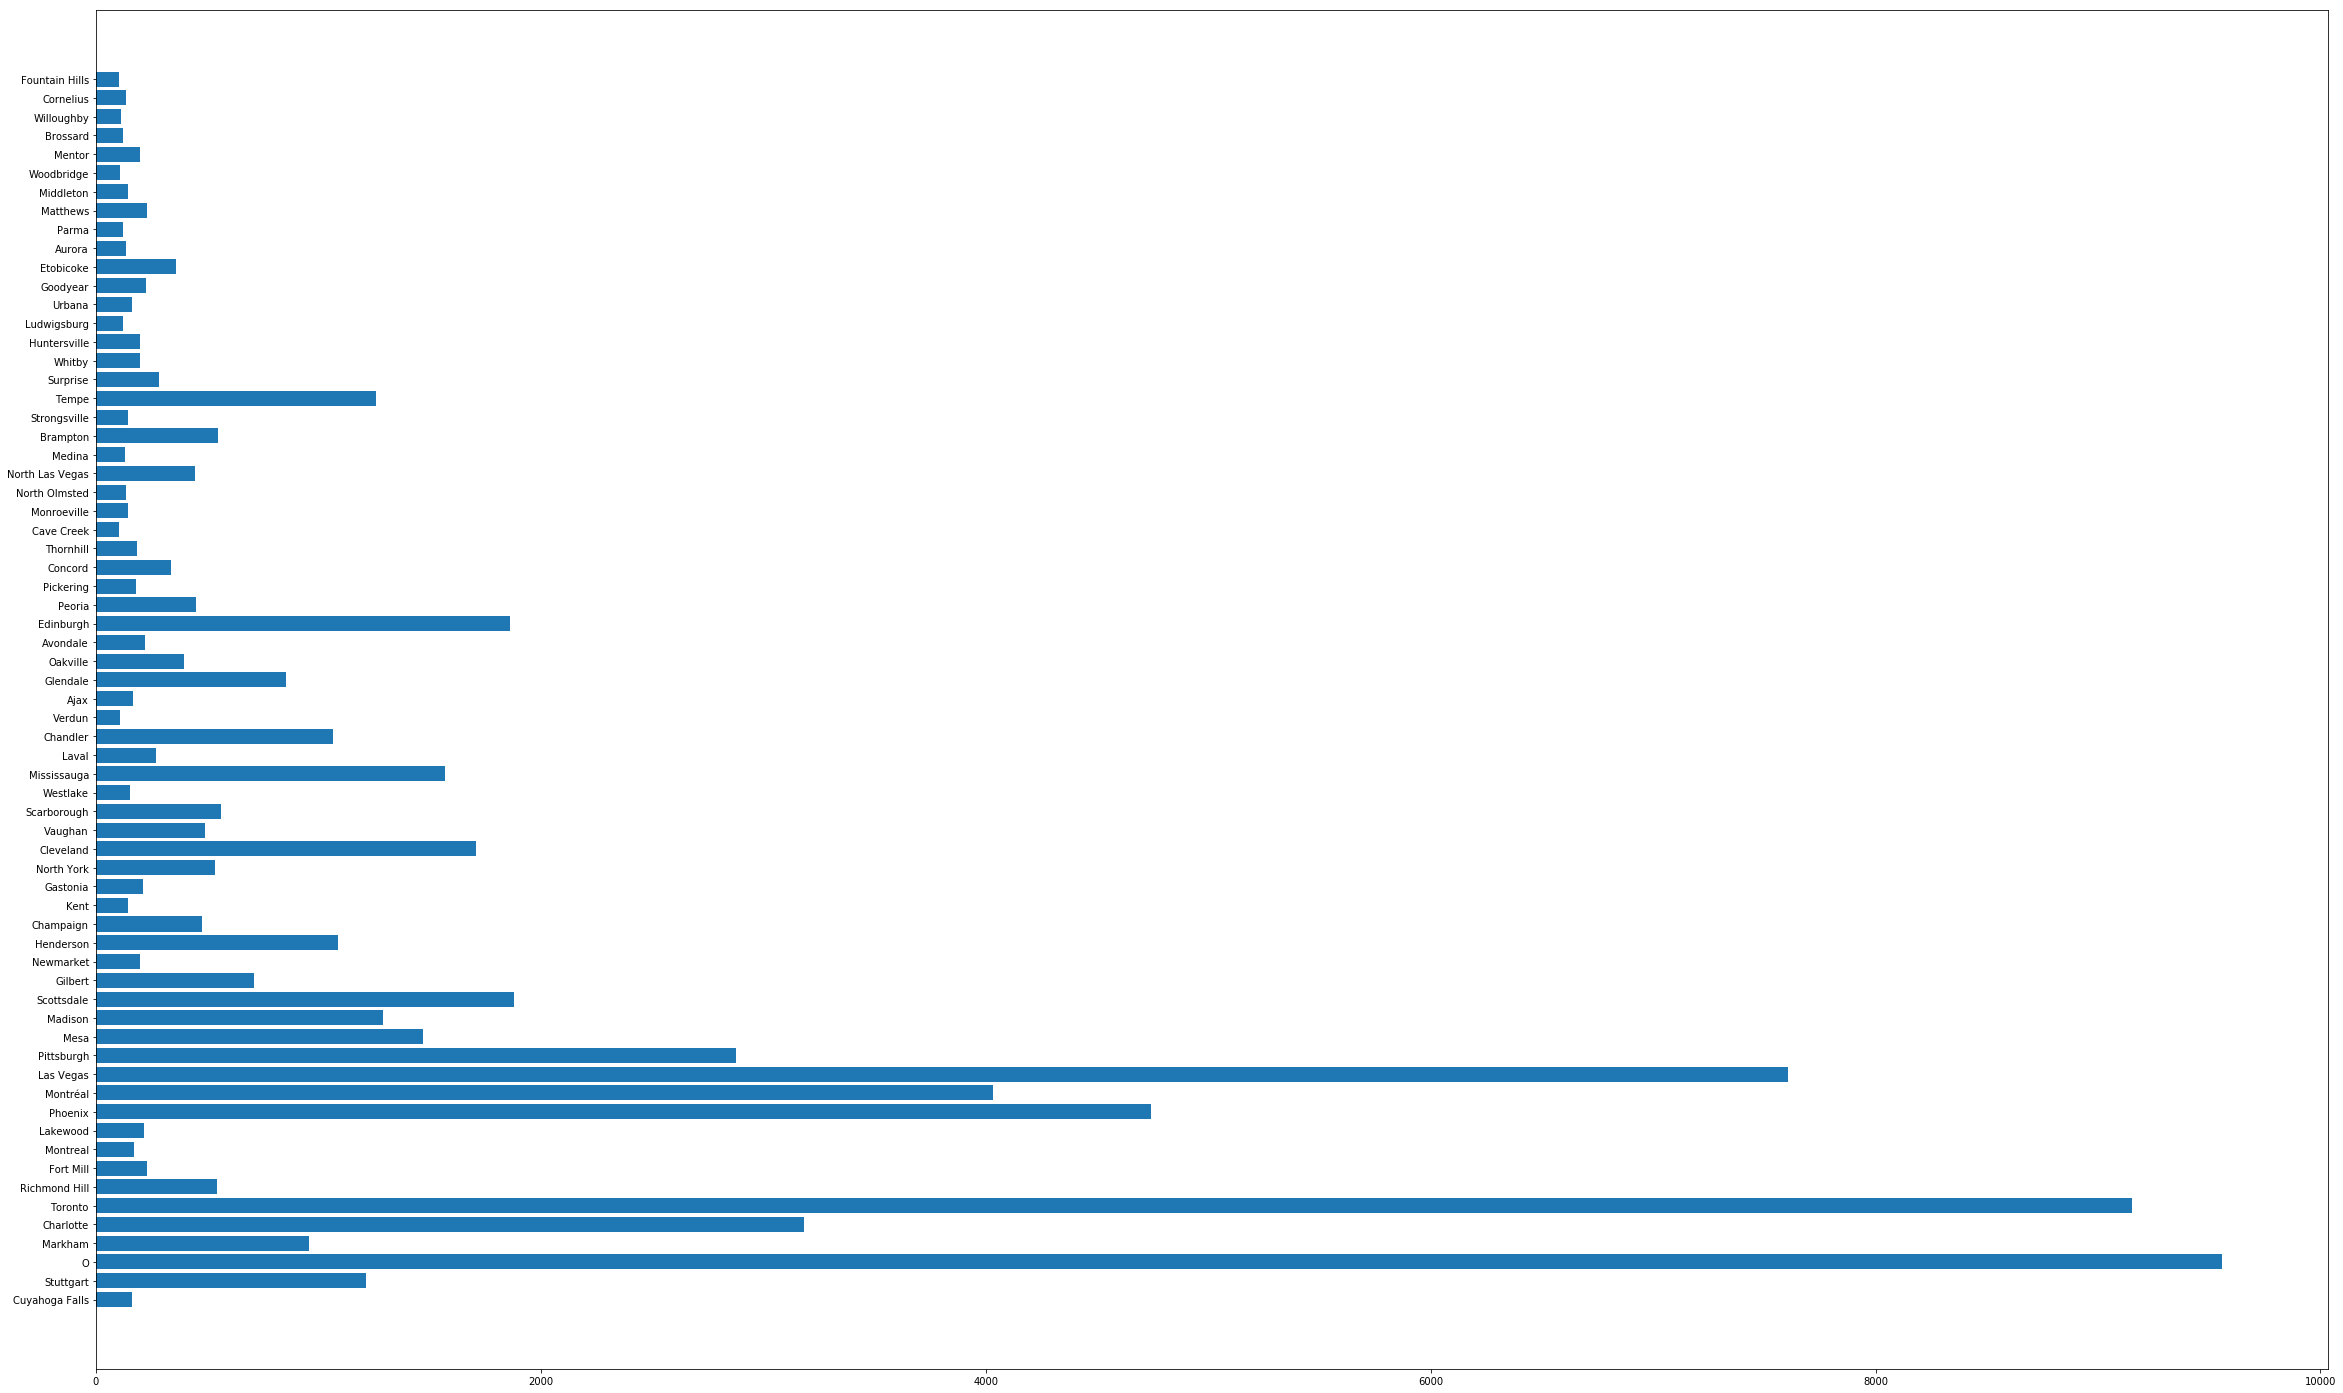

In [86]:
x = city_count_condensed.keys()

plt.figure(figsize=(40, 25))
plt.barh(y=[k[0] for k in x],
       width=[city_count_condensed[k] for k in x])

[614, 711, 853, 957, 1066, 1091, 1213, 1260, 1289, 1468, 1569, 1709, 1881, 1957, 2876, 3183, 4031, 4743, 7608, 9152]


In [ ]:
from collections import Counter

categories = restaurants.categories.values()
categories = [cat for cat in cats.split(";") for cats in categories]
cat_count = Counter(categories)


# Toronto XML?

https://portal0.cf.opendata.inter.sandbox-toronto.ca/dataset/dinesafe-restaurant-health-inspections/

    <ROW_ID>1</ROW_ID><br />
    <ESTABLISHMENT_ID>1222579</ESTABLISHMENT_ID><br />
    <INSPECTION_ID>103868579</INSPECTION_ID><br />
    <ESTABLISHMENT_NAME>SAI-LILA KHAMAN DHOKLA HOUSE</ESTABLISHMENT_NAME><br />
    <ESTABLISHMENTTYPE>Food Take Out</ESTABLISHMENTTYPE><br />
    <ESTABLISHMENT_ADDRESS>870 MARKHAM RD</ESTABLISHMENT_ADDRESS><br />
    <ESTABLISHMENT_STATUS>Pass</ESTABLISHMENT_STATUS><br />
    <MINIMUM_INSPECTIONS_PERYEAR>2</MINIMUM_INSPECTIONS_PERYEAR><br />
    <INFRACTION_DETAILS>Operator fail to properly wash equipment</INFRACTION_DETAILS><br />
    <INSPECTION_DATE>2016-12-21</INSPECTION_DATE><br />
    <SEVERITY>M - Minor</SEVERITY><br />
    <ACTION>Notice to Comply</ACTION><br />
    <COURT_OUTCOME></COURT_OUTCOME><br />
    <AMOUNT_FINED></AMOUNT_FINED><br />
    </ROW>


In [318]:
xml_data = io.StringIO('''<ROW><ROW_ID>1</ROW_ID>
<ESTABLISHMENT_ID>1222579</ESTABLISHMENT_ID>
<INSPECTION_ID>103868579</INSPECTION_ID>
<ESTABLISHMENT_NAME>SAI-LILA KHAMAN DHOKLA HOUSE</ESTABLISHMENT_NAME>
<ESTABLISHMENTTYPE>Food Take Out</ESTABLISHMENTTYPE>
<ESTABLISHMENT_ADDRESS>870 MARKHAM RD</ESTABLISHMENT_ADDRESS>
<ESTABLISHMENT_STATUS>Pass</ESTABLISHMENT_STATUS>
<MINIMUM_INSPECTIONS_PERYEAR>2</MINIMUM_INSPECTIONS_PERYEAR>
<INFRACTION_DETAILS>Operator fail to properly wash equipment</INFRACTION_DETAILS>
<INSPECTION_DATE>2016-12-21</INSPECTION_DATE>
<SEVERITY>M - Minor</SEVERITY>
<ACTION>Notice to Comply</ACTION>
<COURT_OUTCOME></COURT_OUTCOME>
<AMOUNT_FINED></AMOUNT_FINED>
</ROW>''')

def getvalueofnode(node):
    """ return node text or None """
    return node.text if node is not None else None

def read_xml(xml):
    parsed_xml = et.parse(xml)
    if len(parsed_xml.getroot() == 0):
        return
    dfcols = []
    for node in parsed_xml.getroot()[0]:
        dfcols.append(node.tag)
    df_xml = pd.DataFrame(columns=dfcols)
 
    for row in parsed_xml.getroot():
        vals = []
        for node in row:
            vals.append(getvalueofnode(node))
 
        df_xml = df_xml.append(pd.Series(vals, index=dfcols),
                #pd.Series([name, getvalueofnode(email), getvalueofnode(phone),
                #           getvalueofnode(street)], index=dfcols),
        ignore_index = True)
 
    return df_xml


In [272]:
with open("data/safety/toronto_1.xml", "r") as myfile:
    df = read_xml(myfile)
df.head()

,ROW_ID,establishment_id,inspection_id,establishment_name,establishmenttype,establishment_address,latitude,longitude,establishment_status,minimum_inspections_peryear,infraction_details,inspection_date,SEVERITY,action,court_outcome,amount_fined
0,1,1222579,103868579,SAI-LILA KHAMAN DHOKLA HOUSE,Food Take Out,870 MARKHAM RD,43.76797956,-79.229029122,Pass,2,Operator fail to properly wash equipment,2016-12-21,M - Minor,Notice to Comply,,
1,2,1222579,104063869,SAI-LILA KHAMAN DHOKLA HOUSE,Food Take Out,870 MARKHAM RD,43.76797956,-79.229029122,Pass,2,None,2017-10-04,None,None,None,None
2,3,1222579,104246429,SAI-LILA KHAMAN DHOKLA HOUSE,Food Take Out,870 MARKHAM RD,43.76797956,-79.229029122,Pass,2,Fail to Hold a Valid Food Handler's Certificat...,2018-06-20,NA - Not Applicable,Notice to Comply,,
3,4,1222579,104246429,SAI-LILA KHAMAN DHOKLA HOUSE,Food Take Out,870 MARKHAM RD,43.76797956,-79.229029122,Pass,2,Operator fail to properly wash equipment,2018-06-20,M - Minor,Notice to Comply,,
4,5,1222579,104246429,SAI-LILA KHAMAN DHOKLA HOUSE,Food Take Out,870 MARKHAM RD,43.76797956,-79.229029122,Pass,2,Operator fail to properly wash surfaces in rooms,2018-06-20,M - Minor,Notice to Comply,,


In [203]:
for x, y in zip(df.columns, df.iloc[0]):
    print(x, y)
    

ROW_ID 1
establishment_id 1222579
inspection_id 103868579
establishment_name SAI-LILA KHAMAN DHOKLA HOUSE
establishmenttype Food Take Out
establishment_address 870 MARKHAM RD 
latitude 43.76797956
longitude -79.229029122
establishment_status Pass
minimum_inspections_peryear 2
infraction_details Operator fail to properly wash equipment
inspection_date 2016-12-21
SEVERITY M - Minor
action Notice to Comply
court_outcome  
amount_fined  


In [268]:

df_cols = ['ROW_ID', 'establishment_id', 'inspection_id', 'establishment_name',
           'establishmenttype', 'establishment_status', 'minimum_inspections_peryear',
           'infraction_details', 'inspection_date', 'SEVERITY', 'action', 'court_outcome',
           'amount_fined']
sql_cols = ['row_id', 'establishment_id', 'inspection_id', 'name', 'type', 'status',
            'min_inspections_per_year', 'infraction_details', 'inspection_date', 'severity', 'action', 
            'court_outcome', 'amount_fined']

def format_value(v):
    if v:
        v = v.replace("'", "''")
        return "'"+v.replace("\n", "")+"'"
    return "' '"

def make_insert_query(row):
    insert = 'insert into xml_test ({}) values ({});'
    values = [format_value(v) for v in df[df_cols].iloc[row].values]
    if not values[-1].isdigit():
        values[-1] = '0'
    return insert.format(','.join(sql_cols), ','.join(values))

make_insert_query(4)

"insert into xml_test (row_id,establishment_id,inspection_id,name,type,status,min_inspections_per_year,infraction_details,inspection_date,severity,action,court_outcome,amount_fined) values ('5','1222579','104246429','SAI-LILA KHAMAN DHOKLA HOUSE','Food Take Out','Pass','2','Operator fail to properly wash surfaces in rooms','2018-06-20','M - Minor','Notice to Comply',' ',0);"

In [269]:
conn = psycopg2.connect("host=localhost dbname=rpred user=test password=123")

def df_to_sql(conn):
    cur = conn.cursor()
    for i in range(1, len(df.values)):
        cur.execute(make_insert_query(i))
    conn.commit()
    print("done")
    
df_to_sql(conn)
cur = conn.cursor();
cur.execute("select * from xml_test limit 5;")
print(cur.fetchall())  # cur.fetchone()

done
[(1, 1222579, 103868579, 'SAI-LILA KHAMAN DHOKLA HOUSE', 'Food Take Out', 'Pass', 'M - Minor', 'Operator fail to properly wash equipment', 2, 'Notice to Comply', ' ', 0.0, '2016-12-21'), (2, 1222579, 104063869, 'SAI-LILA KHAMAN DHOKLA HOUSE', 'Food Take Out', 'Pass', ' ', ' ', 2, ' ', ' ', 0.0, '2017-10-04'), (3, 1222579, 104246429, 'SAI-LILA KHAMAN DHOKLA HOUSE', 'Food Take Out', 'Pass', 'NA - Not Applicable', "Fail to Hold a Valid Food Handler's Certificate. Muncipal Code Chapter 545-157(17)(b)", 2, 'Notice to Comply', ' ', 0.0, '2018-06-20'), (4, 1222579, 104246429, 'SAI-LILA KHAMAN DHOKLA HOUSE', 'Food Take Out', 'Pass', 'M - Minor', 'Operator fail to properly wash equipment', 2, 'Notice to Comply', ' ', 0.0, '2018-06-20'), (5, 1222579, 104246429, 'SAI-LILA KHAMAN DHOKLA HOUSE', 'Food Take Out', 'Pass', 'M - Minor', 'Operator fail to properly wash surfaces in rooms', 2, 'Notice to Comply', ' ', 0.0, '2018-06-20')]


# Scratch

In [5]:
df = pd.read_csv("data/yelp/yelp_business.csv")

In [6]:
print(df.columns)

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'categories'],
      dtype='object')


In [48]:
restaurants = (df[df['categories'].str.contains("(Restaurant)|(Food)|(Cafe)|(Bakeries)")])
print(len(restaurants))

/home/jessica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


69079


In [63]:
len(restaurants.postal_code.unique())

11039

In [64]:
closed = restaurants[restaurants['is_open'] == 0]

In [117]:
#closed.drop(columns='level_0', inplace=True)
closed.categories.unique()

array(['Breakfast & Brunch;Gluten-Free;Coffee & Tea;Food;Restaurants;Sandwiches',
       'Italian;French;Restaurants',
       'Food;American (Traditional);Coffee & Tea;Restaurants', ...,
       'Food;Grocery;Restaurants;Coffee & Tea;Indian',
       'Coffee & Tea;Nightlife;Food;Bars',
       'Nightlife;Restaurants;Sandwiches;Bars;Canadian (New);Asian Fusion;Pubs'],
      dtype=object)

In [79]:
closed.to_csv("yelp_restaurants_closed.csv")

In [91]:
#df = pd.read_csv("data/yelp/yelp_business_attributes.csv")
df.head()

,business_id,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,RestaurantsPriceRange2,GoodForKids,WheelchairAccessible,...,BYOB,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,FYWN1wneV18bWNgQjJ2GNg,Na,True,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,He-G7vWjzVUysIKrfNbPUQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,8DShNS-LuFqpEWIp0HxijA,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,PfOCPjBrlQAnz__NXj9h_w,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4,o9eMRCWt5PkpLDE0gOPtcQ,Na,Na,False,False,False,False,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


In [96]:
df.drop(columns=['BYOB', 'BYOBCorkage'], inplace=True)

In [101]:
df.NoiseLevel.unique()

array(['Na', 'False', 'True'], dtype=object)

In [104]:
ta = pd.read_csv("data/tripadvisor/tripadvisor_in-restaurant_sample.csv")

In [113]:
print(ta.Rating.unique())
print(ta.Ranking.unique())
print(ta['Good for(suitable)'].unique())
print(ta.Award.unique())
print(ta.Recommended.unique())

[nan '50 out of 50' '45 out of 50' '40 out of 50']
['40 of 61' nan '24 of 53' ... '12,558 of 16,892' '4,644 of 16,899'
 '298 of 1,722']
[nan 'Child-friendly' 'Outdoor seating' 'Child-friendly, Local cuisine'
 'Romantic, Business, Local cuisine, Special Occasion Dining, Entertaining clients'
 'Romantic, Business, Special Occasion Dining, Entertaining clients'
 'Child-friendly, Special Occasion Dining' 'Child-friendly, Cheap Eats'
 'Romantic, Business, Entertaining clients' 'Cheap Eats' 'Bar Scene'
 'Outdoor seating, Entertaining clients'
 'Groups, Business, Entertaining clients'
 'Groups, Local cuisine, Cheap Eats' 'Bar Scene, Groups, Outdoor seating'
 'View, Entertaining clients' 'Romantic, Special Occasion Dining'
 'Local cuisine, Cheap Eats'
 'Business, Local cuisine, Special Occasion Dining, Entertaining clients'
 'Child-friendly, Groups' 'Bar Scene, Outdoor seating' 'Romantic'
 'Entertaining clients'
 'Romantic, Special Occasion Dining, Entertaining clients'
 'Child-friendly, Group

In [116]:
ta.Menu.unique()

array([nan])

# find latest timestamp in Yelp dataset
### Try tips.json (2009-04-15,  2017-12-11)

In [80]:
import re

json = ""
with open("data/yelp2/tip.json") as file:
    json = file.read()
    
regex = re.compile(r'[{}]|("[\w]*":)|\\', re.IGNORECASE)

def format_str(regex, string):
    return regex.sub("", string)

items = json.split("\n")
csv = [format_str(regex, row) for row in items]

regex2 = re.compile(".*(\d{4}-\d{2}-\d{2}).*")
dates = set()
for row in csv:
    m = regex2.match(row)
    if m:
        dates.add(m.group(1))
    else:
        print(row)
        
dates = sorted(list(dates))
print(dates[0], dates[-1])


2009-04-15 2017-12-11


In [ ]:
json = ""
with open("data/yelp2/")

# find latest timestamp in Kaggle dataset
select date from yelp_reviews_1 order by date asc limit 1;
    date    
------------
 2004-07-22
(1 row)

select date from yelp_reviews_1 order by date desc limit 1;
    date    
------------
 2017-12-11
(1 row)